In [2]:
from dataset_loader import *
from encode_decode import *
from train_model import *
from test_model import *
import matplotlib.pyplot as plt
import numpy as np

# first load the data
data = dataset_loader(delta_t = 40.0, k = 10, offset = 10) 

# setup some data specific variables
dt = data.delta_t
X_train = data.X_train['walking']
y_train = data.y_train['walking']
opt_flows_train = data.optical_flows_train['walking']
motion_representations_train = data.motion_representations_train['walking']

X_test = data.X_test['walking']
y_test = data.y_test['walking']
opt_flows_test = data.optical_flows_test['walking']


INFO:dataset_loader.data:Pickled data available. Loading now!
INFO:dataset_loader.data:Success! Completed loading the data!


In [13]:
# now, tune the model
learning_rates = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]
learning_rates = [1e-9, 1e-2]
losses = []
best_rate = None
best_loss = np.inf

for lr in learning_rates:
    
    epoch_losses = train_model(X_train, y_train, dt, \
                               opt_flows_train, motion_representations_train, lr, \
                               epochs = 100, tune = True, print_every = 5)
    losses.append(epoch_losses)
    if epoch_losses[-1] < best_loss:
        best_loss = epoch_losses[-1]
        best_rate = lr  
print('Best learning rate found for 100 epochs of training {}'.format(best_rate))

INFO:train_model.model_trainer:Completed setting up the computational graph!
INFO:train_model.model_trainer:Completed iteration 1
INFO:train_model.model_trainer:Completed epoch 1
INFO:train_model.model_trainer:Loss after epoch 1 : 2062060032.0
INFO:train_model.model_trainer:All epochs of training now complete.
INFO:train_model.model_trainer:Saved the model to results directory.
INFO:train_model.model_trainer:Training complete.
INFO:train_model.model_trainer:Completed setting up the computational graph!
INFO:train_model.model_trainer:Completed iteration 1
INFO:train_model.model_trainer:Completed epoch 1
INFO:train_model.model_trainer:Loss after epoch 1 : 455343680.0
INFO:train_model.model_trainer:All epochs of training now complete.
INFO:train_model.model_trainer:Saved the model to results directory.
INFO:train_model.model_trainer:Training complete.


0.01


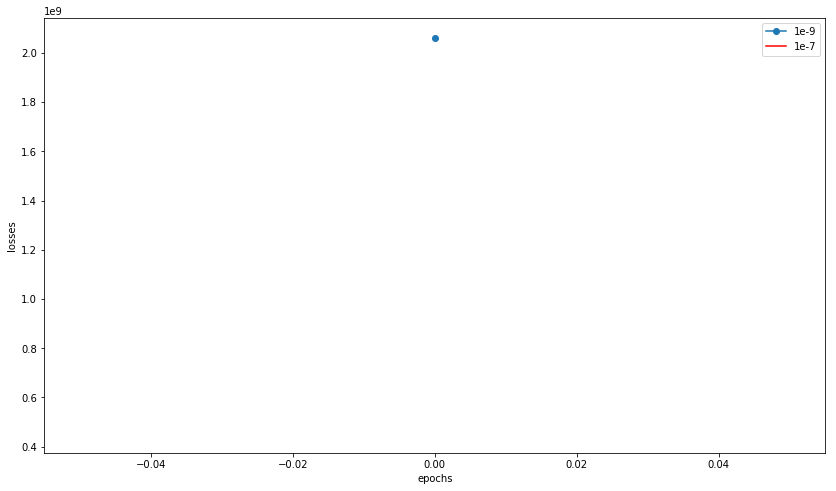

In [22]:
plt.figure(figsize=(14, 8))

# visualize results
losses = np.array(losses)
plt.plot(losses[0], '-o')
plt.plot(losses[1], '-r')
plt.plot(losses[2], '-b')
plt.plot(losses[3], '-g')
plt.plot(losses[4], '-y')
plt.legend(['1e-9', '1e-7', '1e-5', '1e-3', '1e-1'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

In [ ]:
# train again using the best found learning rate and save the model!